# Customer Segmentation and Analysis #

### Steps to solve the problem :
1. Importing Libraries.
1. Exploration of data.
1. Data Visualization.
1. Clustering using K-Means.
1. Selection of Clusters.
1. Ploting the Cluster Boundry and Clusters.
1. 3D Plot of Clusters.

### Importing Libraries.

In [1]:
# Importing necessary libraries for data analysis and visualization
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for statistical data visualization
import plotly as py  # for interactive plotting
import plotly.graph_objs as go  # for creating various types of plots
from sklearn.cluster import KMeans  # for K-means clustering
import warnings  # for suppressing specific warning messages
import os  # for operating system-dependent functionality

# Suppressing warning messages
warnings.filterwarnings("ignore")

# Initializing Plotly to work offline in a Jupyter Notebook environment
py.offline.init_notebook_mode(connected=True)

# Print the list of files in the input directory (currently commented out)
# print(os.listdir("../input"))


# Data Exploration. #

### Import source data

In [14]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')


# Display the first few rows of the DataFrame
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Dimension of data

In [15]:
df.shape

(200, 5)

### Statistical analysis of data 

In [16]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Data type (Object or integer)

In [17]:
df.dtypes


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Finding if data contains any empty entry

In [18]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Visualization #


### Setting plotting style

In [ ]:
# Set the plotting style to 'fivethirtyeight'
plt.style.use('fivethirtyeight'

### Plotting histograms

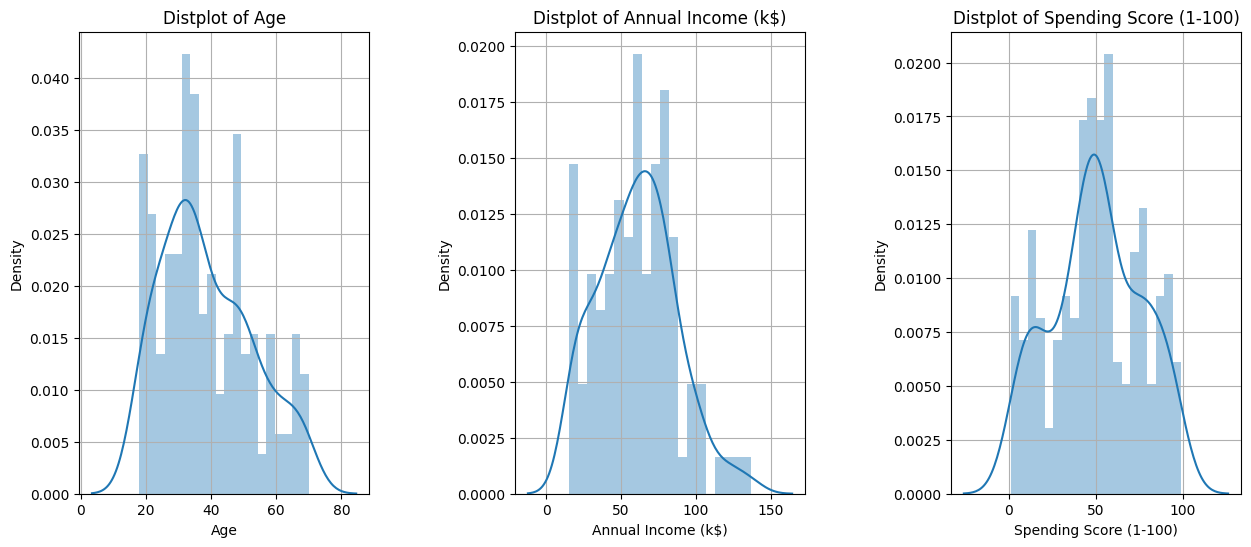

In [41]:
plt.figure(1, figsize=(15, 6))  # Create a figure with a specific size

# Loop over the features and create a subplot for each
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)  # Create subplot
    plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust space between subplots
    sns.distplot(df[x], bins=20)  # Plot distribution using Seaborn
    plt.title('Distplot of {}'.format(x))  # Set title for subplot
    plt.grid(True)  # Display grid lines


plt.show()  # Show the figure with subplots


### Plotting count of gender


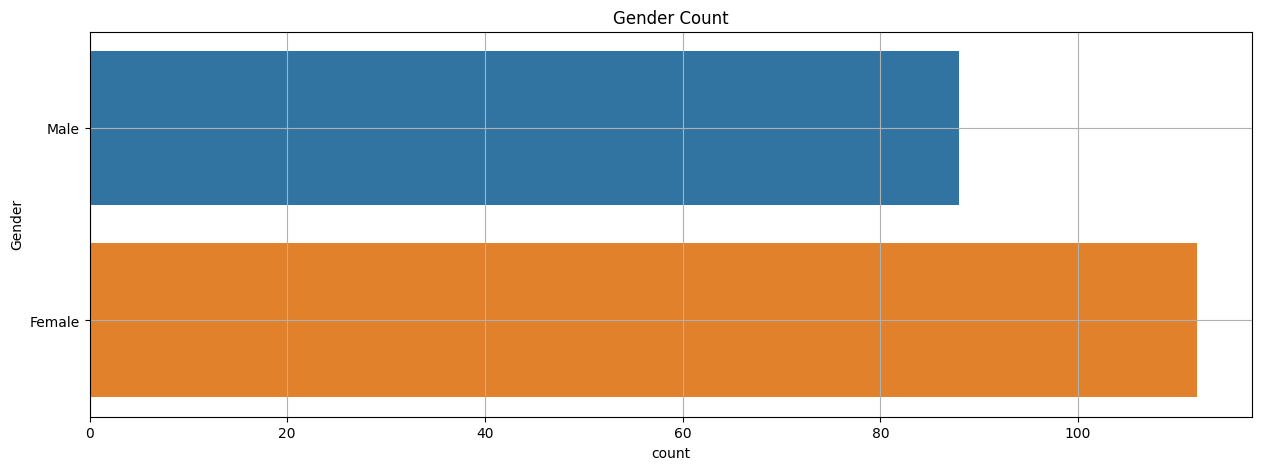

In [40]:
plt.figure(1, figsize=(15, 5))  # Create a figure with a specific size
sns.countplot(y='Gender', data=df)  # Create a count plot using Seaborn
plt.title('Gender Count')  # Set plot title
plt.grid(True)  # Display grid lines
plt.show()  # Show the plot


### Plotting the relation between Age , Annual Income and Spending Score


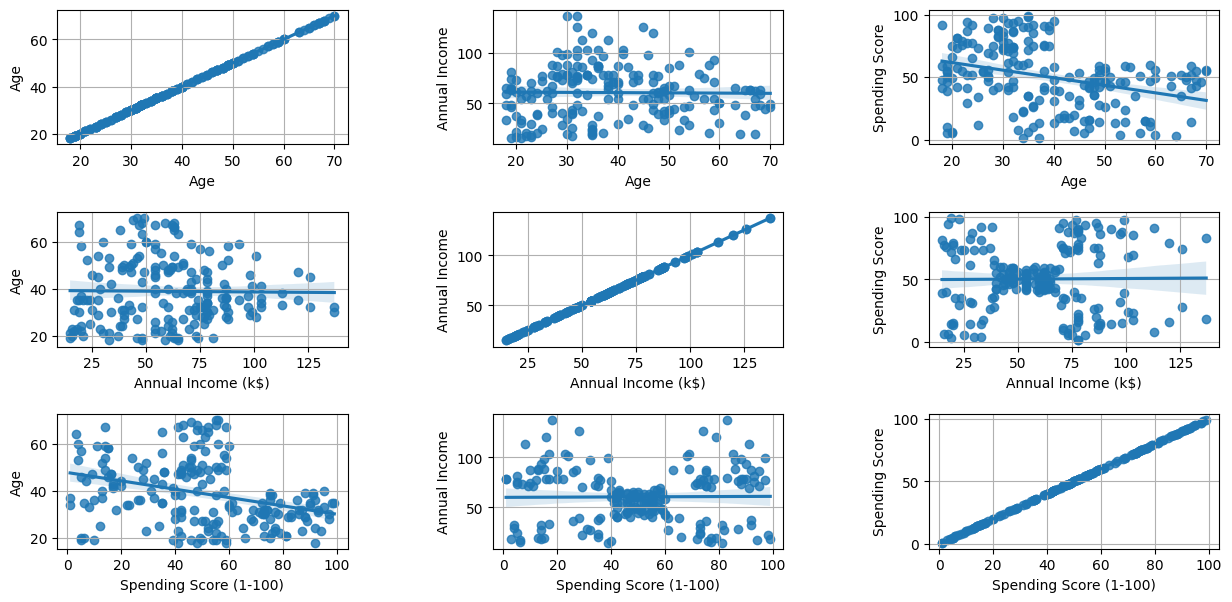

In [38]:
plt.figure(1, figsize=(15, 7))  # Create a figure with a specific size

# Loop over each pair of features and create a scatter plot
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3, 3, n)  # Create subplot
        plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust space between subplots
        sns.regplot(x=x, y=y, data=df)  # Create scatter plot with regression line
        plt.ylabel(y.split()[0] + ' ' + y.split()[1] if len(y.split()) > 1 else y)  # Set y-axis label
        plt.grid(True)  # Display grid lines

plt.show()  # Show the figure with subplots


### Plotting relation of Age vs Annual Income w.r.t Gender

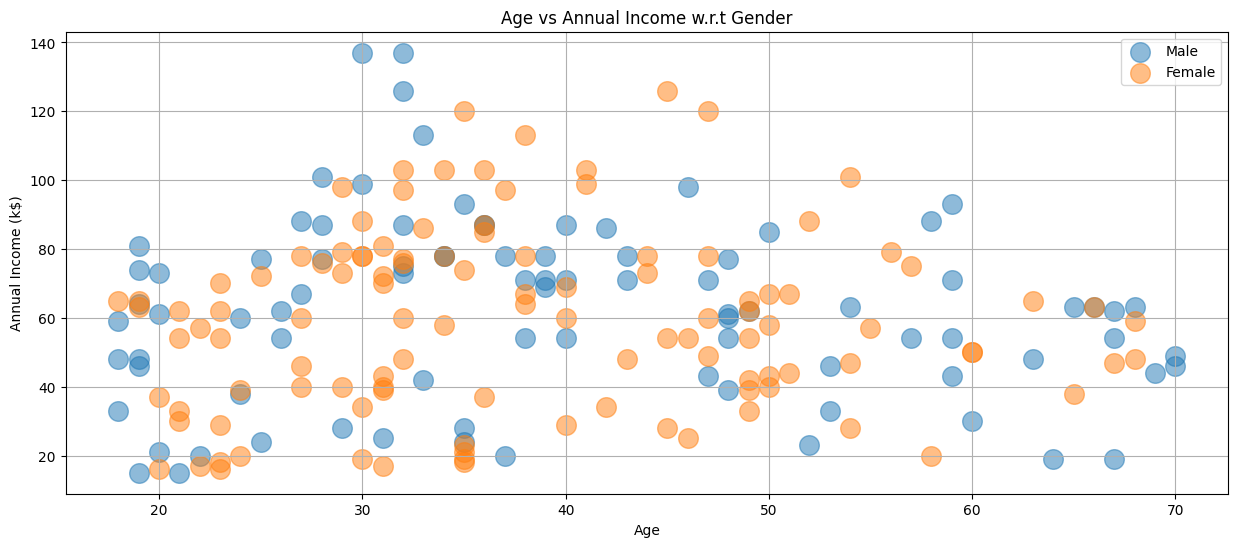

In [37]:
plt.figure(1, figsize=(15, 6))  # Create a figure with a specific size

# Loop over each gender category and create a scatter plot
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Annual Income (k$)', data=df[df['Gender'] == gender],
                s=200, alpha=0.5, label=gender)

plt.xlabel('Age')  # Set x-axis label
plt.ylabel('Annual Income (k$)')  # Set y-axis label
plt.title('Age vs Annual Income w.r.t Gender')  # Set plot title
plt.grid(True)  # Display grid lines
plt.legend()  # Show legend
plt.show()  # Show the plot

### Plotting relation of Annual Income vs Spending Score w.r.t Gender

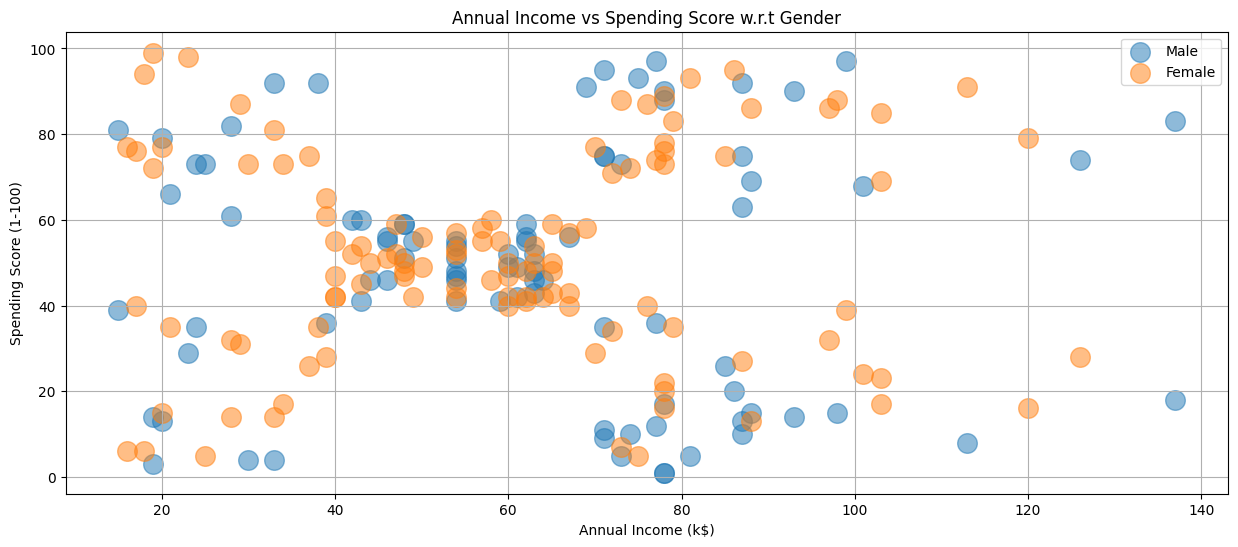

In [36]:
plt.figure(1, figsize=(15, 6))  # Create a figure with a specific size

# Loop over each gender category and create a scatter plot
for gender in ['Male', 'Female']:
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=df[df['Gender'] == gender], s=200, alpha=0.5, label=gender)

plt.xlabel('Annual Income (k$)')  # Set x-axis label
plt.ylabel('Spending Score (1-100)')  # Set y-axis label
plt.title('Annual Income vs Spending Score w.r.t Gender')  # Set plot title
plt.grid(True)  # Display grid lines
plt.legend()  # Show legend
plt.show()  # Show the plot


### Distribution of values in Age , Annual Income and Spending Score according to Gender


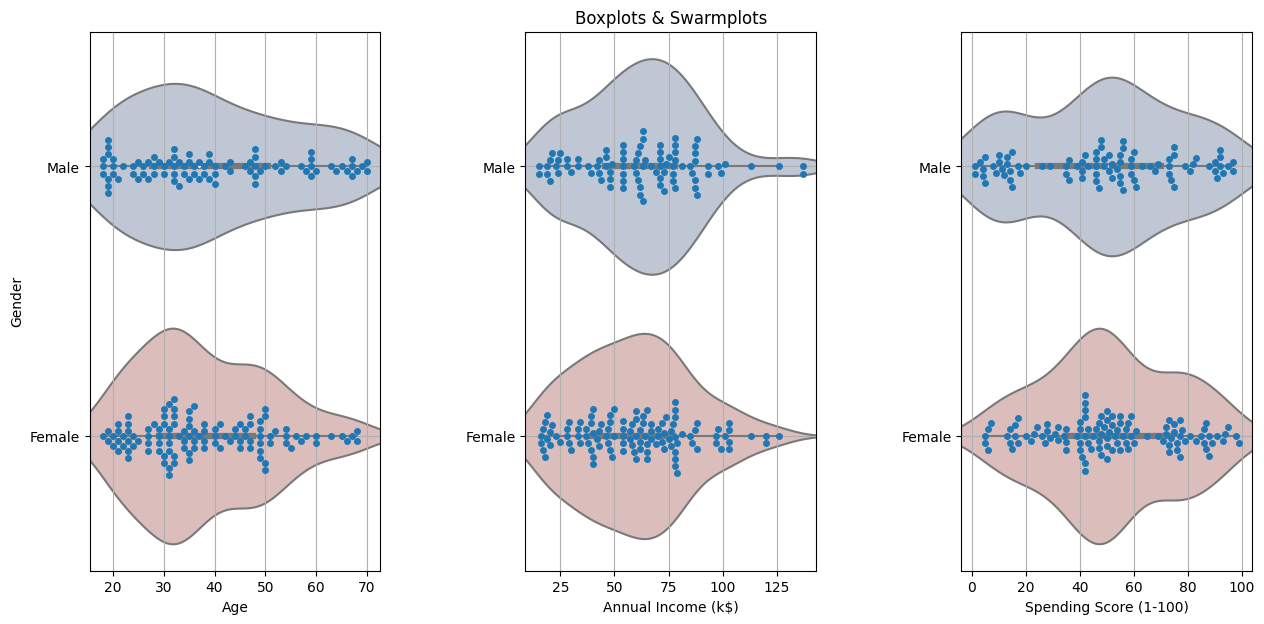

In [35]:
plt.figure(1, figsize=(15, 7))  # Create a figure with a specific size

# Loop over each column and create a subplot
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)  # Create subplot
    plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust space between subplots
    
    # Create a violin plot and swarm plot for the current column
    sns.violinplot(x=cols, y='Gender', data=df, palette='vlag')  # Violin plot
    sns.swarmplot(x=cols, y='Gender', data=df)  # Swarm plot
    
    plt.ylabel('Gender' if n == 1 else '')  # Set y-axis label for the first subplot
    plt.title('Boxplots & Swarmplots' if n == 2 else '')  # Set plot title for the second subplot
    plt.grid(True)  # Display grid lines


plt.show()  # Show the figure with subplots


# Clustering using K- means #


# 1. Segmentation using Age and Spending Score


In [29]:
X1 = df[['Age', 'Spending Score (1-100)']].iloc[:, :].values  # Extracting the features and converting them into a NumPy array
inertia = []  # Initializing an empty list to store inertia values

# Looping over the number of clusters from 1 to 10
for n in range(1, 11):
    algorithm = (KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan'))
    algorithm.fit(X1)  # Fitting the K-means algorithm to the data
    inertia.append(algorithm.inertia_)  # Appending the inertia of the fitted model to the list


### Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)


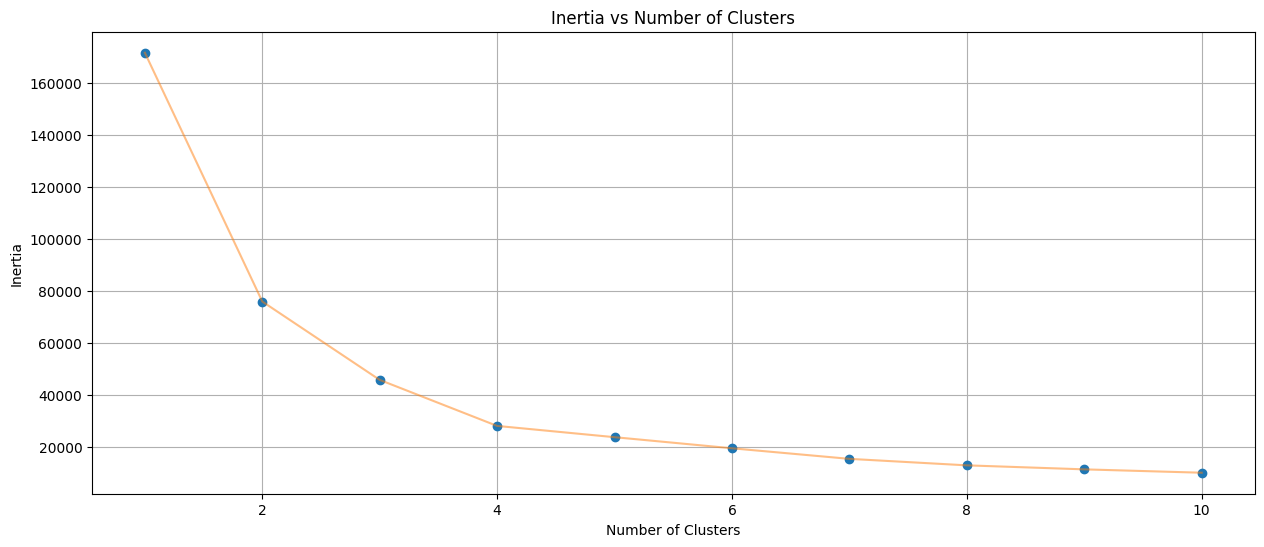

In [34]:
plt.figure(1, figsize=(15, 6))  # Create a figure with a specific size
plt.plot(np.arange(1, 11), inertia, 'o')  # Plotting inertia values
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)  # Plotting inertia values with a solid line
plt.xlabel('Number of Clusters')  # Set x-axis label
plt.ylabel('Inertia')  # Set y-axis label
plt.title('Inertia vs Number of Clusters')  # Set plot title
plt.grid(True)  # Display grid lines
plt.show()  # Show the plot

## Initialize K-Means algorithm

In [57]:
# Initialize KMeans algorithm with specified parameters
algorithm = KMeans(n_clusters=4, 
                   init='k-means++', 
                   n_init=10, 
                   max_iter=300, 
                   tol=0.0001, 
                   random_state=111, 
                   algorithm='elkan')

# Fit the KMeans algorithm to the data X1
algorithm.fit(X1)

# Extract cluster labels assigned to each data point
labels1 = algorithm.labels_

# Extract centroids of the clusters
centroids1 = algorithm.cluster_centers_

### Predicting the cluster labels

In [58]:
# Define the step size for the mesh grid
h = 0.02

# Define the range of x and y values for the mesh grid
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1

# Create the mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the cluster labels for each point in the mesh grid
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])


### Plotting the label prediction

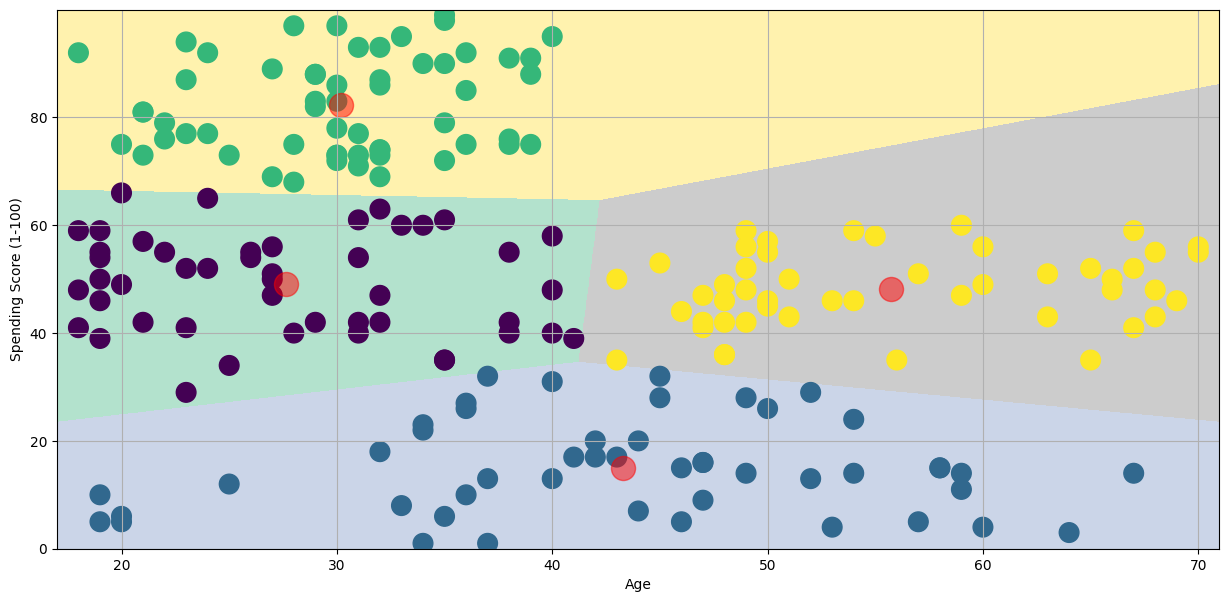

In [60]:
plt.figure(1, figsize=(15, 7))
plt.clf()  # Clear the current figure

# Reshape the predictions to match the mesh grid dimensions
Z = Z.reshape(xx.shape)

# Display the cluster boundaries as colored regions
plt.imshow(Z, interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

# Scatter plot of data points colored by cluster labels
plt.scatter(x='Age', y='Spending Score (1-100)', data=df, c=labels1, s=200)

# Scatter plot of centroids
plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], s=300, c='red', alpha=0.5)

plt.ylabel('Spending Score (1-100)')  # Set y-axis label
plt.xlabel('Age')  # Set x-axis label
plt.grid(True)  # Display grid lines
plt.show()  # Show the plot


# 2. Segmentation using Annual Income and Spending Score


In [61]:
# Extract features 'Annual Income (k$)' and 'Spending Score (1-100)' and convert them into a NumPy array
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

# Initialize an empty list to store inertia values
inertia = []

# Loop over the number of clusters from 1 to 10
for n in range(1, 11):
    # Initialize KMeans algorithm with specified parameters
    algorithm = KMeans(n_clusters=n, 
                       init='k-means++', 
                       n_init=10, 
                       max_iter=300, 
                       tol=0.0001, 
                       random_state=111, 
                       algorithm='elkan')
    
    # Fit the KMeans algorithm to the data X2
    algorithm.fit(X2)
    
    # Append the inertia (within-cluster sum of squares) of the fitted model to the list
    inertia.append(algorithm.inertia_)


### Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)


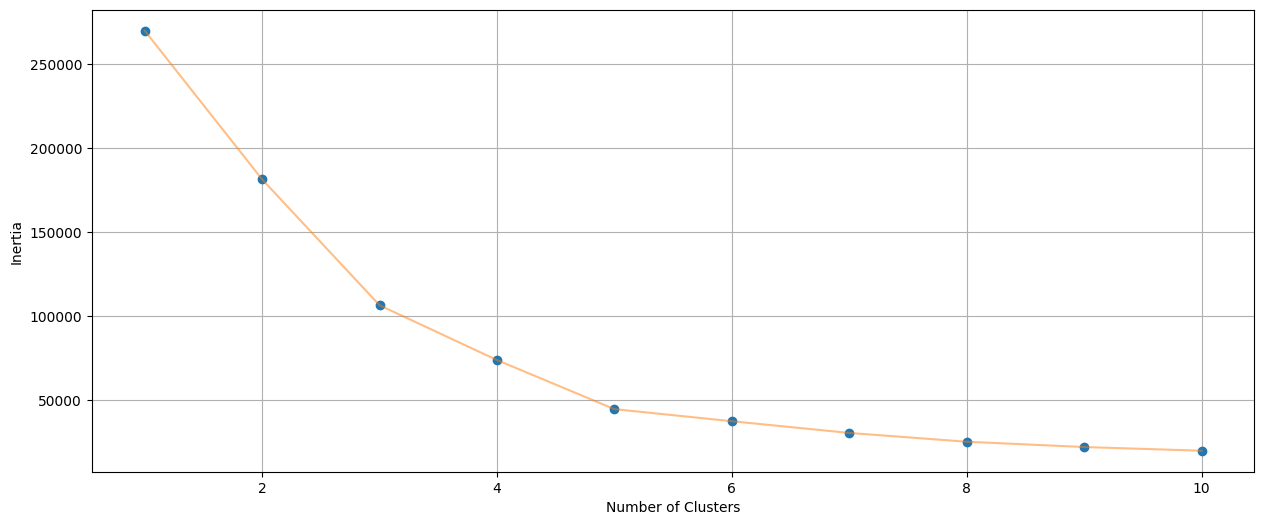

In [62]:
plt.figure(1, figsize=(15, 6))  # Create a figure with a specific size

# Plot inertia values against the number of clusters
plt.plot(np.arange(1, 11), inertia, 'o')  # Plot points with circles
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)  # Plot lines with transparency

# Set x-axis label and y-axis label
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)  # Display grid lines

# Display the plot
plt.show()

## Initialize K-Means algorithm

In [63]:
# Initialize KMeans algorithm with specified parameters
algorithm = KMeans(n_clusters=5, 
                   init='k-means++', 
                   n_init=10, 
                   max_iter=300, 
                   tol=0.0001, 
                   random_state=111, 
                   algorithm='elkan')

# Fit the KMeans algorithm to the data X2
algorithm.fit(X2)

# Extract cluster labels assigned to each data point
labels2 = algorithm.labels_

# Extract centroids of the clusters
centroids2 = algorithm.cluster_centers_


### Predicting the cluster labels

In [64]:
# Define the step size for the mesh grid
h = 0.02

# Define the range of x and y values for the mesh grid
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1

# Create the mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the cluster labels for each point in the mesh grid
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])


### Plotting the label prediction

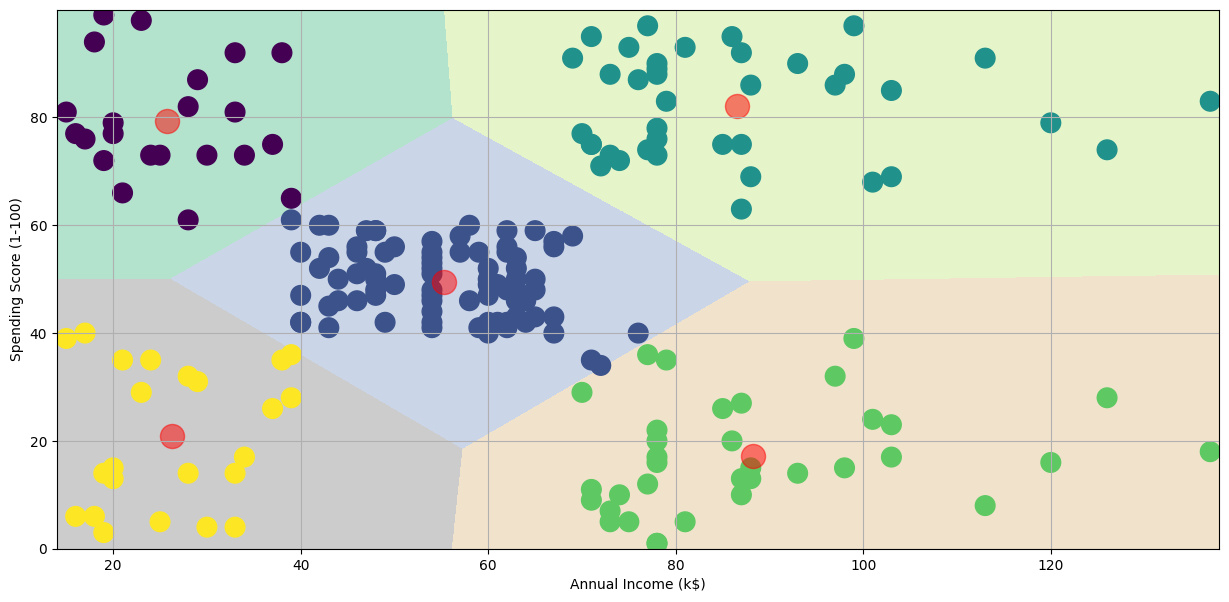

In [65]:
plt.figure(1, figsize=(15, 7))
plt.clf()  # Clear the current figure

# Reshape the predictions to match the mesh grid dimensions
Z2 = Z2.reshape(xx.shape)

# Display the cluster boundaries as colored regions
plt.imshow(Z2, interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

# Scatter plot of data points colored by cluster labels
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
# Scatter plot of centroids
plt.scatter(x=centroids2[:, 0], y=centroids2[:, 1], s=300, c='red', alpha=0.5)

plt.ylabel('Spending Score (1-100)')  # Set y-axis label
plt.xlabel('Annual Income (k$)')  # Set x-axis label
plt.grid(True)  # Display grid lines
plt.show()  # Show the plot


# 3. Segmentation using Age , Annual Income and Spending Score


In [54]:
# Extract features 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' and convert them into a NumPy array
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

# Initialize an empty list to store inertia values
inertia = []

# Loop over the number of clusters from 1 to 10
for n in range(1, 11):
    # Initialize KMeans algorithm with specified parameters
    algorithm = KMeans(n_clusters=n, 
                       init='k-means++', 
                       n_init=10, 
                       max_iter=300, 
                       tol=0.0001, 
                       random_state=111, 
                       algorithm='elkan')
    
    # Fit the KMeans algorithm to the data X3
    algorithm.fit(X3)
    
    # Append the inertia (within-cluster sum of squares) of the fitted model to the list
    inertia.append(algorithm.inertia_)


### Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)


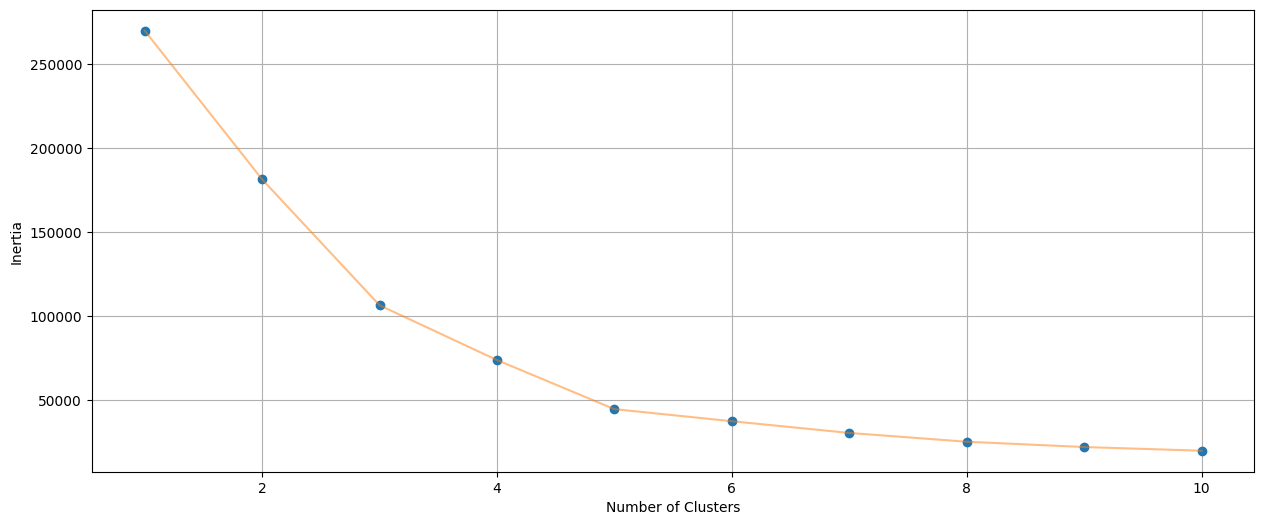

In [66]:
plt.figure(1, figsize=(15, 6))  # Create a figure with a specific size

# Plot inertia values against the number of clusters
plt.plot(np.arange(1, 11), inertia, 'o')  # Plot points with circles
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)  # Plot lines with transparency

# Set x-axis label and y-axis label
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)  # Display grid lines

# Display the plot
plt.show()


## Initialize K-Means algorithm

In [67]:
# Initialize KMeans algorithm with specified parameters
algorithm = KMeans(n_clusters=6, 
                   init='k-means++', 
                   n_init=10, 
                   max_iter=300, 
                   tol=0.0001, 
                   random_state=111, 
                   algorithm='elkan')

# Fit the KMeans algorithm to the data X3
algorithm.fit(X3)

# Extract cluster labels assigned to each data point
labels3 = algorithm.labels_

# Extract centroids of the clusters
centroids3 = algorithm.cluster_centers_


# 3D Plotting of the Clusters #

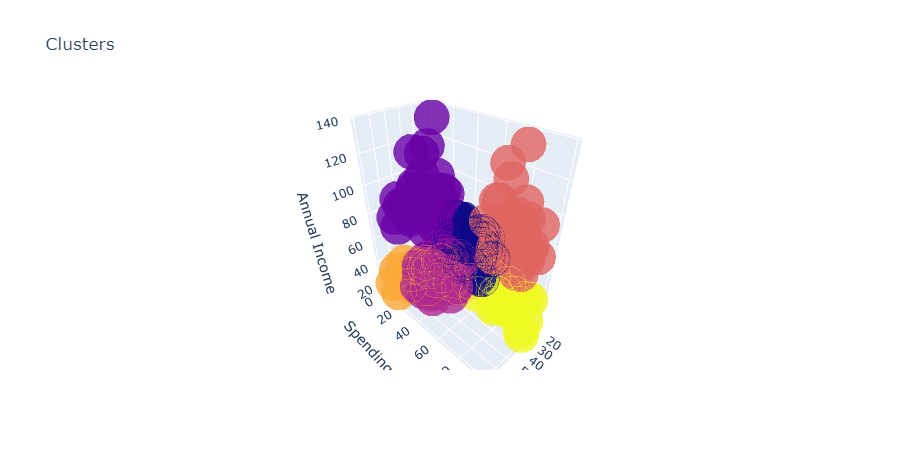

In [69]:
# Add the cluster labels as a new column in the DataFrame df
df['label3'] = labels3

# Define the trace for the 3D scatter plot
trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    z=df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=df['label3'],  # Color by cluster labels
        size=20,
        line=dict(
            color=df['label3'],
            width=12
        ),
        opacity=0.8
    )
)

# Define the data for the plot
data = [trace1]

# Define the layout for the plot
layout = go.Layout(
    title='Clusters',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    )
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Plot the figure
py.offline.iplot(fig)



# If you liked my Work Please Upvote , Thank you.